In [4]:
import pandas as pd

# Define column names based on the UCI dataset description
column_names = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Add Wilderness Area columns (binary)
column_names += [f'Wilderness_Area_{i}' for i in range(4)]

# Add Soil Type columns (binary)
column_names += [f'Soil_Type_{i}' for i in range(40)]

# Add target column
column_names += ['Cover_Type']

# Load the dataset
df = pd.read_csv("Data/data.data", header=None, names=column_names)

# Preview the dataset
print("Shape:", df.shape)
print(df.head())


Shape: (581012, 55)
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            23

In [5]:
# Check for null values
print("Missing values per column:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check target value distribution
print("\nTarget distribution:\n", df['Cover_Type'].value_counts())


Missing values per column:
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Stratify to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (464809, 54)
Testing shape: (116203, 54)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9533316695782381

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [18]:
# 1. Adjust target labels for XGBoost (1–7 → 0–6)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# 2. Initialize and fit XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train_xgb)


C:\Users\saadp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:17:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

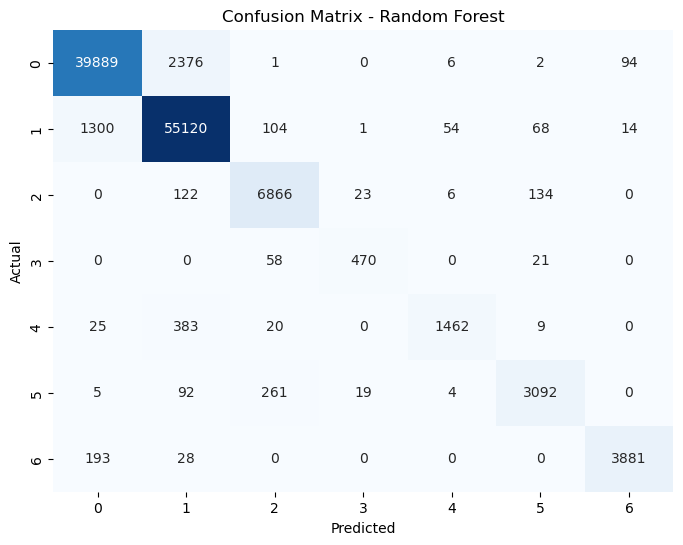

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_rf.png")   # ✅ Save the figure
plt.show()


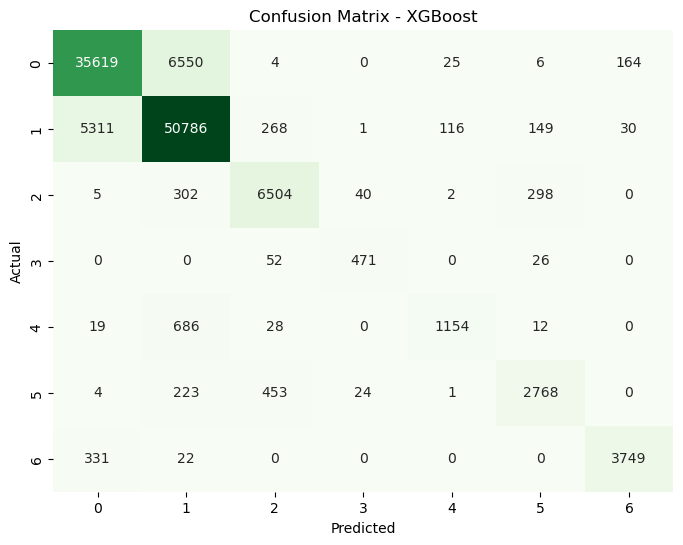

In [24]:
xgb_cm = confusion_matrix(y_test, xgb_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("charts/confusion_matrix_rf.png")  # ⬅ save to charts folder
plt.show()


In [19]:
# 3. Predict and shift predictions back from 0–6 to 1–7
xgb_preds = xgb_model.predict(X_test)
xgb_preds = xgb_preds + 1  # Shift back to original label space

# 4. Evaluate XGBoost performance
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.8696074972246843

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.88      0.86      0.87       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



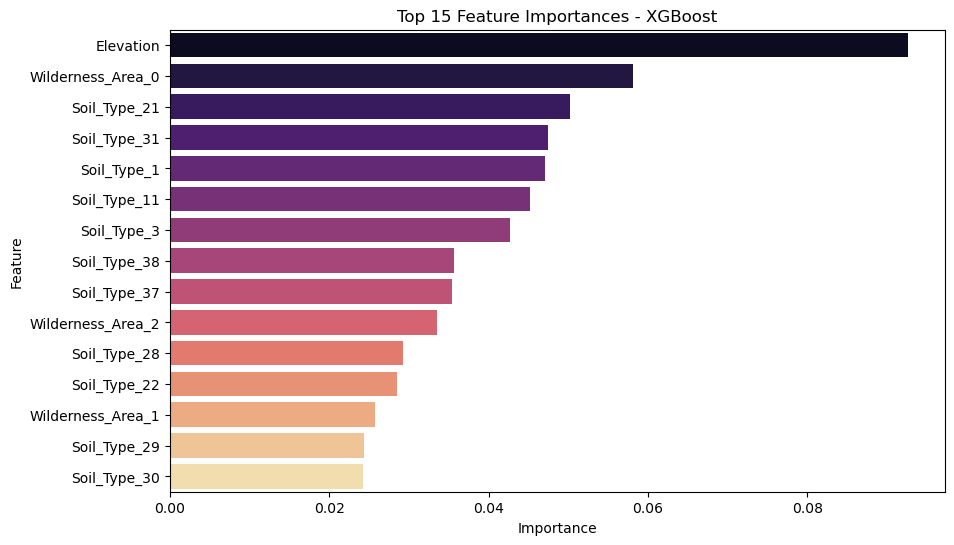

In [23]:
# 5. XGBoost Feature Importance Plot
xgb_importances = xgb_model.feature_importances_

xgb_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=xgb_importances_df.head(15),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='magma',
    legend=False
)
plt.title('Top 15 Feature Importances - XGBoost')
plt.savefig("xgb_feature_importance.png")   # ✅ Save the figure
plt.show()
